In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<h1>Women's Crime Data set</h1>

In [2]:
wc = pd.read_csv('CrimesOnWomenData.csv', index_col=0) #Data collection 

In [3]:
wcd = wc.copy() #Data cleaning

In [4]:
wcd.drop_duplicates()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


In [5]:
wcd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   736 non-null    object
 1   Year    736 non-null    int64 
 2   Rape    736 non-null    int64 
 3   K&A     736 non-null    int64 
 4   DD      736 non-null    int64 
 5   AoW     736 non-null    int64 
 6   AoM     736 non-null    int64 
 7   DV      736 non-null    int64 
 8   WT      736 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 57.5+ KB


<h2>1. Which state has the highest number of reported rape cases, and how does it compare to other states?</h2>

In [6]:
#steps 1. Data Aggregation >> 
aggregated = wcd.groupby('State')['Rape'].sum().mean()

#step 2. sorting >>

sortit = wcd.sort_values(by='Rape', ascending=False)
sortit[['State', 'Rape']]

# Step 4. Max value >>
maxified = wcd['Rape'].max()

# Step 5. Finding the state which have highest rape cases
Maxification = wcd[wcd['Rape'] == maxified]['State'].values[0]

wcd['Maximum Rapes'] = Maxification

print(f"Punjab has the maximum rape cases: {maxified} in last 20 years")

# >> insights : Punjab State has the maximum rape cases with the count of 6337 in 20 years

Punjab has the maximum rape cases: 6337 in last 20 years


<h2>2. How have kidnapping and abduction (K&A) cases trended in the state with the highest reports?</h2>

In [7]:
kas = wcd.groupby('State').agg({'K&A': 'max'}).sort_values(by='K&A', ascending=False)

print(f"Most trending Killing and Abduction cases: \n\n", kas)


# insights >> The most Killing and Abduction Cases were happened in Uttar Pradesh with cout of 15381 in past 20 years

Most trending Killing and Abduction cases: 

                   K&A
State                
Uttar Pradesh   15381
Tripura         10574
Bihar            9025
Uttarakhand      7740
Madhya Pradesh   7559
...               ...
Mizoram             8
DAMAN & DIU         3
MIZORAM             2
LAKSHADWEEP         1
Lakshadweep         0

[70 rows x 1 columns]


<h2>3. Which state reports the most cases of dowry deaths (DD), and has this number changed significantly over time?</h2>

Highest state that had Dowry deaths over 20 years is Uttar Pradesh


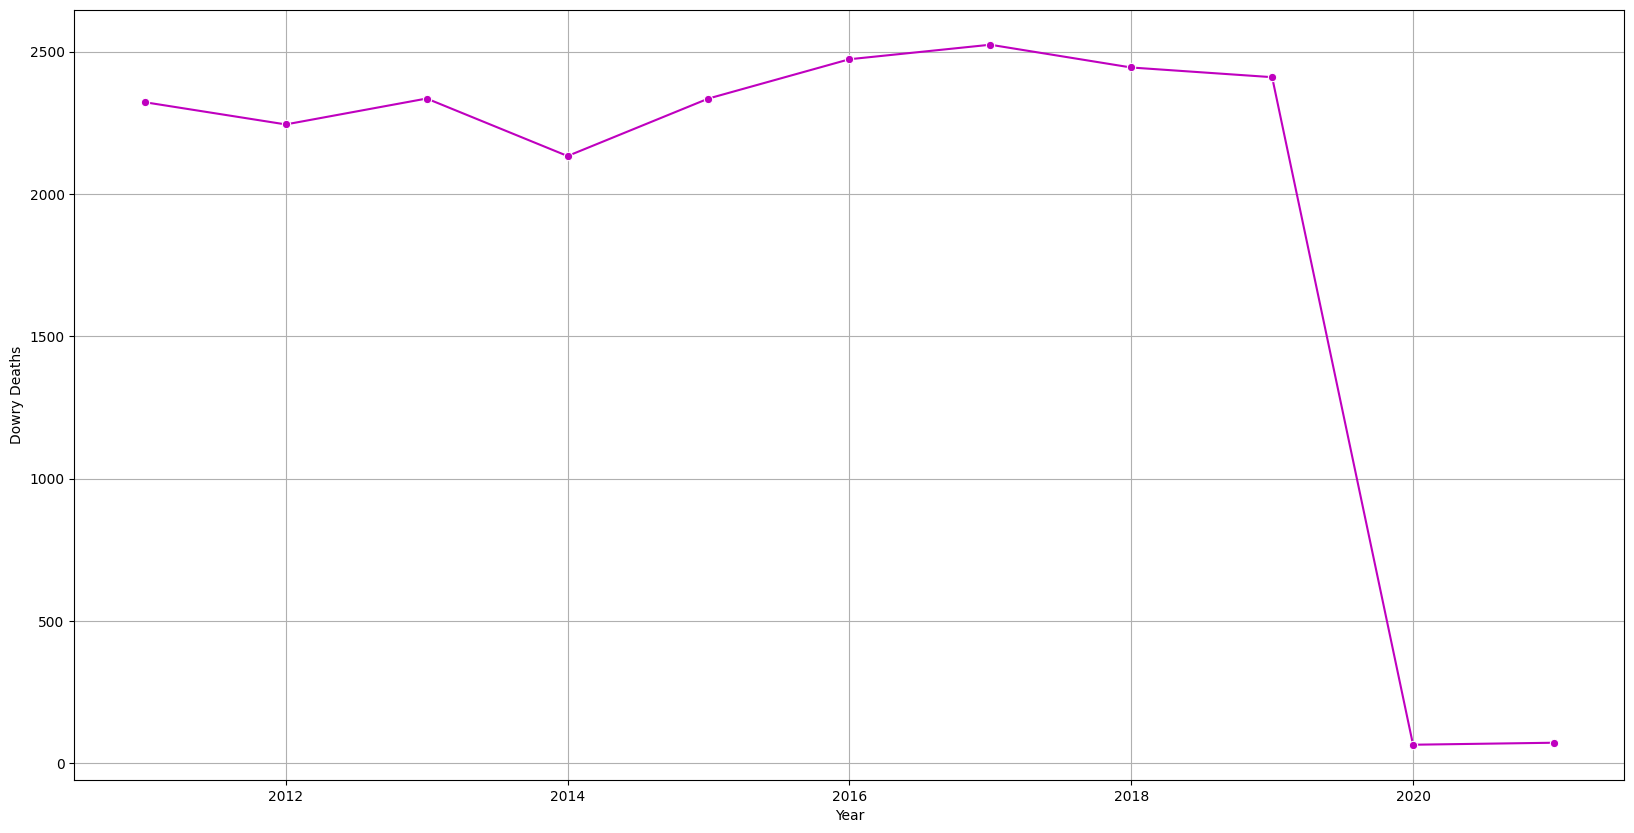

In [8]:
yvd = wcd.groupby('State')['DD'].sum().idxmax()

state_data = wcd[wcd['State'] == yvd].sort_values(by='Year', ascending=True)

print(f"Highest state that had Dowry deaths over 20 years is {yvd}")

plt.figure(figsize=(20, 10))

sns.lineplot(data=state_data, x='Year', y='DD', color='m', marker='o')

plt.xlabel('Year')

plt.ylabel('Dowry Deaths')

plt.grid()

plt.show()

# >>insights : according to the analysis and visual aspects this can be can that the highest dowry deaths were held in Uttar Pradesh among other states, but the cases have been much decreased

<h2>1. How do cases of domestic violence (DV) compare with other crimes such as assault on women (AoW) across different states?</h2>

                    DV    AoW
State                        
West Bengal     171204  33851
Rajasthan       126917  41801
Assam           107680  36528
Uttar Pradesh   100227  76654
Andhra Pradesh   96269  49750
...                ...    ...
D & N HAVELI        35     46
DAMAN & DIU         30     15
Lakshadweep         11     19
NAGALAND             8     71
LAKSHADWEEP          6      4

[70 rows x 2 columns]


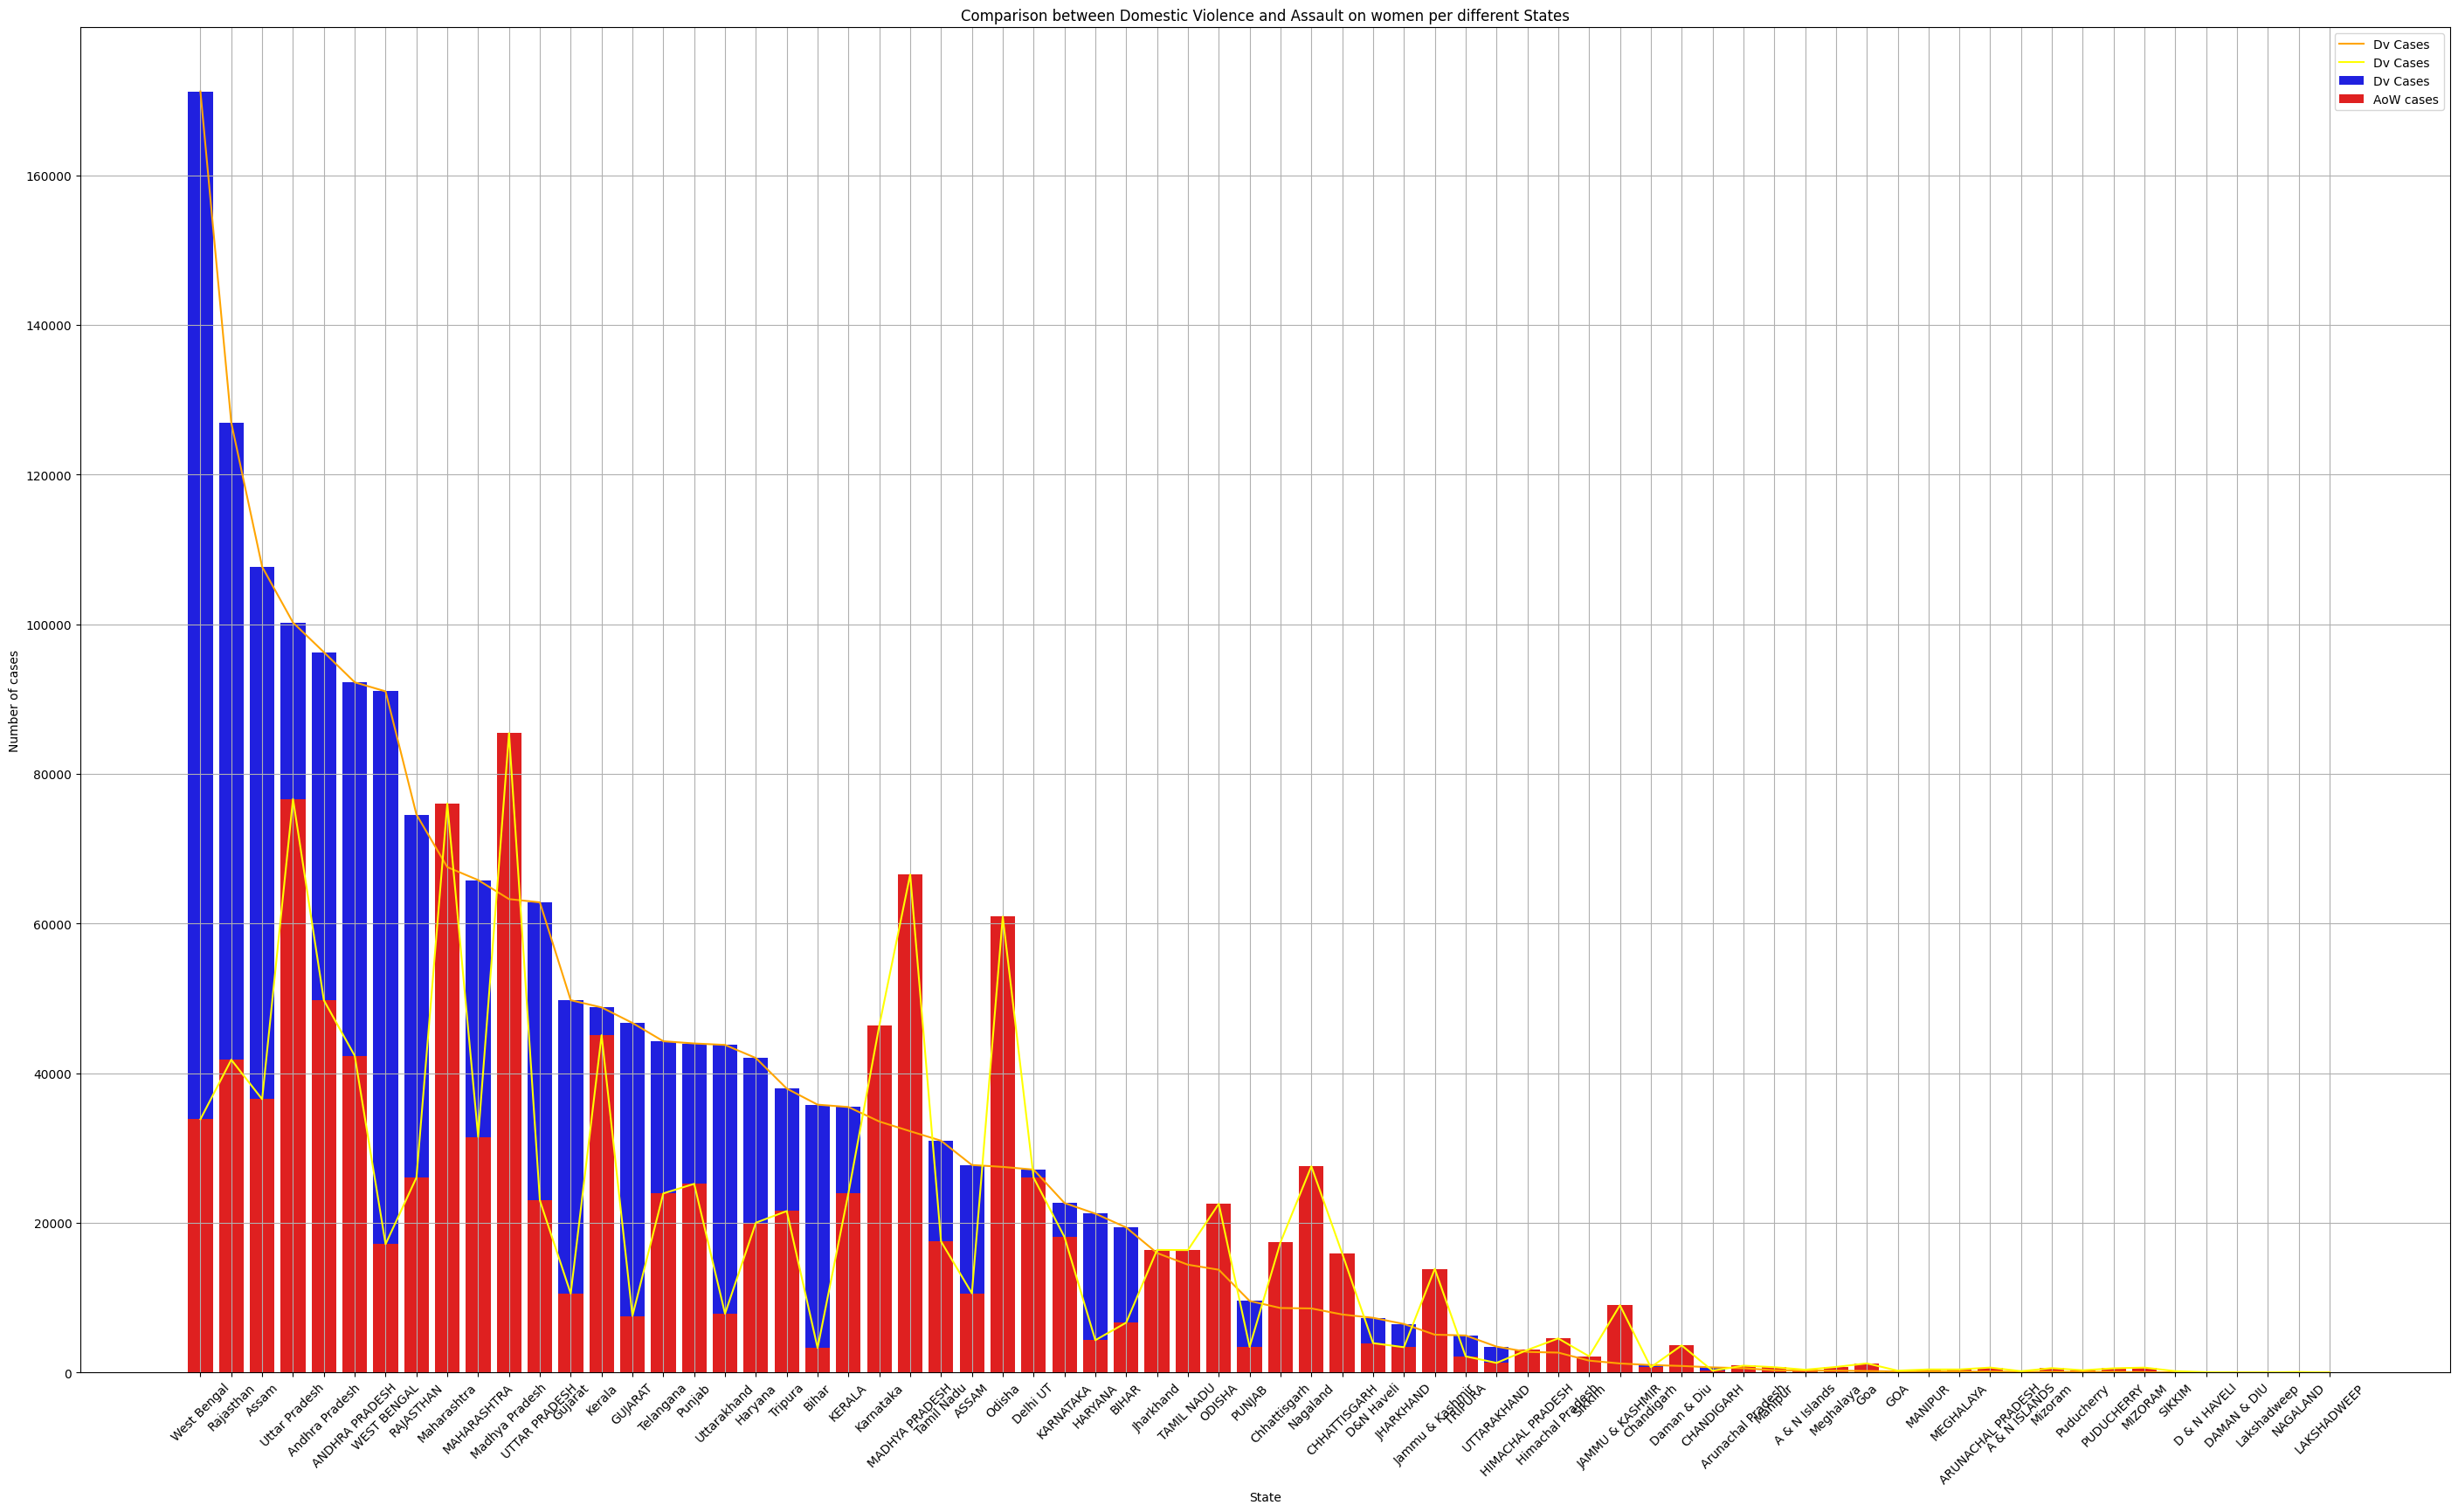

In [9]:
sdov = wcd.groupby('State').agg({'DV':'sum', 'AoW':'sum'}).sort_values(by='DV', ascending=False)

print(sdov)

sdov.reset_index
plt.figure(figsize=(35, 20))
sns.barplot(x='State', y='DV', data=sdov, color='blue', label='Dv Cases')
sns.barplot(x='State', y='AoW',data=sdov, color='red', label='AoW cases')

#
sns.lineplot(x='State', y='DV', data=sdov, color='orange', label='Dv Cases')
sns.lineplot(x='State', y='AoW', data=sdov, color='yellow', label='Dv Cases')

plt.grid()
plt.xlabel('State')
plt.ylabel('Number of cases')
plt.title('Comparison between Domestic Violence and Assault on women per different States')
plt.xticks(rotation=45)
plt.show()
# insights>> West Bengal has highest Domestic Violence and Assault on women cases from past 20 years 

<h2>2. Are there states where certain types of crimes, such as trafficking (WT), are more prevalent compared to others?</h2>

In [10]:
wcd.groupby('State').agg({'WT': 'sum'}).sort_values(by='WT', ascending=False)

# insights >> Tamil Nadu has more women trafficking compared to other states  in past 20 years 

,WT
State,
Tamil Nadu,4026
Karnataka,2796
Maharashtra,2531
Andhra Pradesh,2531
Kerala,990
...,...
DAMAN & DIU,0
D & N HAVELI,0
CHANDIGARH,0


<h2>3. Is there a correlation between the number of rape cases and domestic violence cases in any specific state? ### Not completed</h2> 

In [7]:
# np.correlate(wcd['Rape'], wcd['DV'])
correlatedVals = wcd.groupby('State').apply(lambda x: x['Rape'].corr(x['DV'], method='spearman'))
print(correlatedVals)

plt.figure(figsize=(10, 6))
plt.subplot(1,2,2)
sns.kdeplot(wcd['Rape'],fill=True, label='Rape')
sns.kdeplot(wcd['DV'], fill=True, label='Domestic Violence')
plt.title('Kde plot')

plt.legend()
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'scipy'

<h2>1. Which state saw the most significant increase in crimes against women from one year to the next?</h2>

In [13]:
wcd['Total_Crimes'] = wcd[['Rape','K&A','DD','AoW', 'AoM', 'DV', 'WT' ]].sum(axis=1)

groupIt = wcd.groupby(['State', 'Year'])['Total_Crimes'].sum().reset_index()
groupIt.sort_values(by=['State', 'Year'])
groupIt['Yearly_changed'] = groupIt.groupby('State')['Total_Crimes'].diff()
maximum_increase = groupIt.loc[groupIt['Yearly_changed'].idxmax()]
maximum_increase
# >>Interpretation : Tripura has been significant state increase in crimes against women, total crimes reported were 38523. The difference from previous 2019  37,650, means there was a sudden surge in the increase rate of crime between 2019 and 2020

State             Tripura
Year                 2020
Total_Crimes        38523
Yearly_changed    37650.0
Name: 671, dtype: object

<h2>2. How have dowry death (DD) cases trended over the years, and are there any years with sharp increases or decreases?</h2>

In [ ]:
DowryD = wcd.groupby('Year').agg({'DD' : 'sum'}).reset_index().sort_values(by='Year', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=DowryD, x='Year', y='DD', palette='rocket')
plt.title("Year V/S Dowry Deaths")
plt.xlabel("Year")
plt.ylabel("Dowry Deaths")
plt.xticks(rotation=45)
plt.show()
DowryD
# >> According to the analysis there was a sharp increase in the Dowry Deaths from 2003-2014 which might indicate worsening condition.
# A sharp decrese from 2015-2021 which could have been indicate that efforts to reduce dowry-related crimes were effective

<h2>3. What is the impact of legislative changes (if any are known) on the trends observed in the dataset?</h2>

In [ ]:
impact = wcd.groupby('Year').agg({'Total_Crimes': 'sum'}).reset_index().sort_values(by='Year')

plt.figure(figsize=(10, 6))
sns.barplot(data=impact, x='Year' ,y='Total_Crimes', palette='rocket')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Total_Crimes')
plt.title('Legislative Impact')
plt.show()

# From 2001 to 2021, total reported crimes against women showed a clear upward trend, with a significant increase observed between 2003 and 2014. 
# This rise may reflect heightened awareness and increased reporting rather than a true surge in incidents. However, from 2015 onwards, there was a noticeable decline in crime rates,
# which could be attributed to improved law enforcement, policy changes, or better crime prevention measures. 
# Overall, while crime rates increased in the earlier years, recent years show a positive shift with fewer reported incidents.

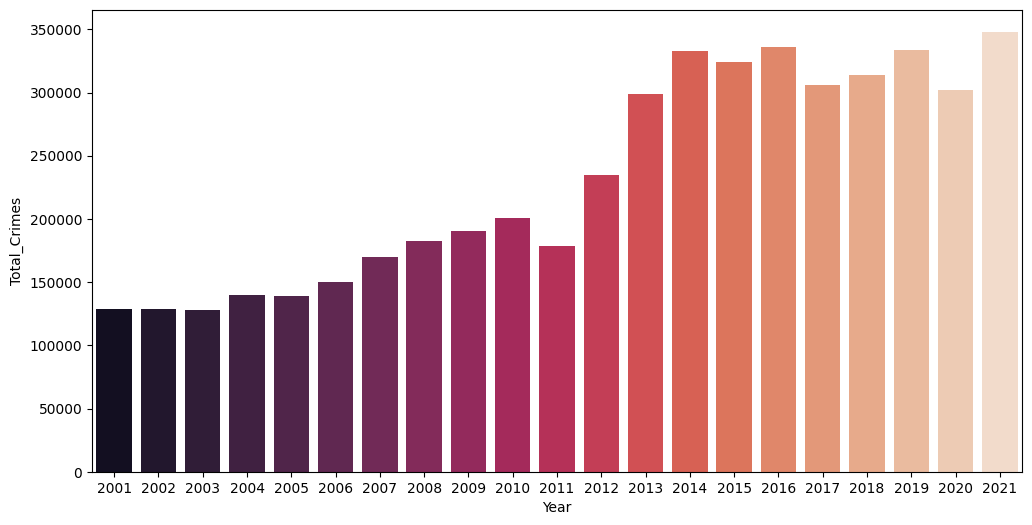

In [22]:
growth = wcd.groupby('Year').agg({'Total_Crimes': 'sum'}).reset_index().sort_values(by='Year')

plt.figure(figsize=(12,6))
sns.barplot(data=growth, x='Year', y='Total_Crimes', palette='rocket')
plt.xticks(rotation=2)
plt.show()